In [10]:
import sys
from pathlib import Path
import os
from matplotlib import pyplot as plt
from tqdm import tqdm
sys.path += [str(Path().resolve().parent.parent)]

from utils.Spectrogram import Spectrogram


# Reading files

In [16]:
spectrogram_dir_path = '/Volumes/T7/Datasets/XenoCanto/spectrograms'

# Loop through the directory

time_lens = []

for file_name in tqdm(os.listdir(spectrogram_dir_path), 'Reading files'):
    if not file_name.startswith('.'):
        file_path = os.path.join(spectrogram_dir_path, file_name)
        Spectrum = Spectrogram(file_path)
        
        time_lens.append(Spectrum.time_bins.shape[0])
            

Reading files: 100%|██████████| 15516/15516 [08:49<00:00, 29.28it/s]


# Time-axis lengths Histogram

Lower: -5306.5, Upper: 18239.5
Dataset original len: 7758.	Dataset without outliers len:7382
Outliers lower bound: 18256


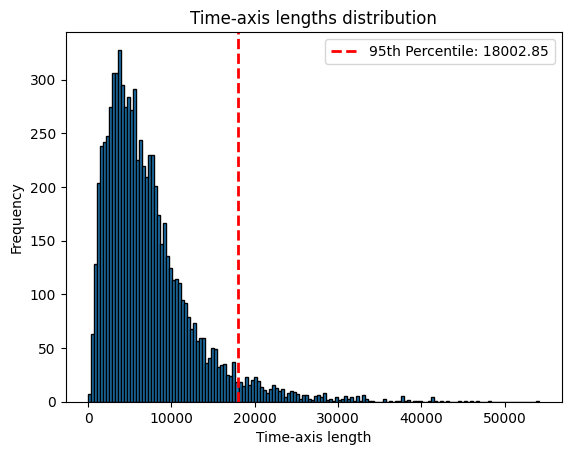

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Quartile and IQR calculation
Q1 = np.percentile(time_lens, 25)
Q3 = np.percentile(time_lens, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower: {lower_bound}, Upper: {upper_bound}')

# 95 percentile calculation
percentile_95 = np.percentile(time_lens, 95)

# Outliers
outliers = [x for x in time_lens if x < lower_bound or x > upper_bound]
print(f'Dataset original len: {len(time_lens)}.\tDataset without outliers len:{len(time_lens) - len(outliers)}')
print(f'Outliers lower bound: {min(outliers)}')

# Histogram calculations
plt.hist(time_lens, bins=150, edgecolor='black')
plt.xlabel('Time-axis length')
plt.ylabel('Frequency')
plt.title('Time-axis lengths distribution')
plt.axvline(percentile_95, color='r', linestyle='dashed', linewidth=2, label=f'95th Percentile: {percentile_95:.2f}')

plt.legend()
plt.show()

In [7]:
import random
num_log_images = 1
batch_size = 1
random_indices = random.sample(range(batch_size), min(num_log_images, batch_size))

In [8]:
random_indices

[0]